In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import japanize_matplotlib
from PIL import Image
import os
import cv2

from NN_functions import txt_img, img_data


In [2]:
print(matplotlib.matplotlib_fname())

/Users/rashidalawadhi/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/matplotlibrc


In [3]:
print([f for f in font_manager.fontManager.ttflist if 'Goth' in f.name])

#Choose your ttf font of your choice

matplotlib.rcParams['font.family'] = ['Zen Maru Gothic']


[FontEntry(fname='/Users/rashidalawadhi/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/BIZUDPGothic-Regular.ttf', name='BIZ UDPGothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable'), FontEntry(fname='/Users/rashidalawadhi/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/ZenMaruGothic-Regular.ttf', name='Zen Maru Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable'), FontEntry(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf', name='AppleGothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable'), FontEntry(fname='/System/Library/AssetsV2/com_apple_MobileAsset_Font7/0ab217c39c45c7c6acaddfa199fd32c55a7b4a19.asset/AssetData/ToppanBunkyuGothicPr6N.ttc', name='Toppan Bunkyu Gothic', style='normal', variant='normal', weight=600, stretch='normal', size='scalable'), FontEntry(fname='/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc', name='H

In [4]:
#This finds the directory of matplotlib's font cache. Delete it so that matplotlib can see your newly added font. Restart the kernel after adding the new font file.
print(matplotlib.get_cachedir())


/Users/rashidalawadhi/.matplotlib


In [5]:
#This is our dataset

# df_json = pd.DataFrame(pd.read_json('kanji_extra.json')).T

# df_extra = df_json.reset_index()[['index', 'strokes']].rename(columns={'index':'kanji'}).truncate(after=12155)
# print(df_extra['kanji'][35])
# full_df = pd.concat([df_extra[0:6353], df_extra[0:6353], df_extra[0:6353], df_extra[0:6353], df_extra[0:6353], df_extra[0:6353], df_extra[0:6353]], ignore_index=True)
# full_df

full_df = pd.read_csv('data/trimmed_df/trimmed_df.csv')
test_df = pd.read_csv('data/trimmed_df/test_df.csv')

In [6]:
full_df = pd.concat([full_df[0:6053], full_df[0:6053],full_df[0:6053],full_df[0:6053],full_df[0:6053]], ignore_index=True)

In [7]:
full_df.head()

,kanji,strokes
0,一,1
1,二,2
2,九,2
3,七,2
4,人,2


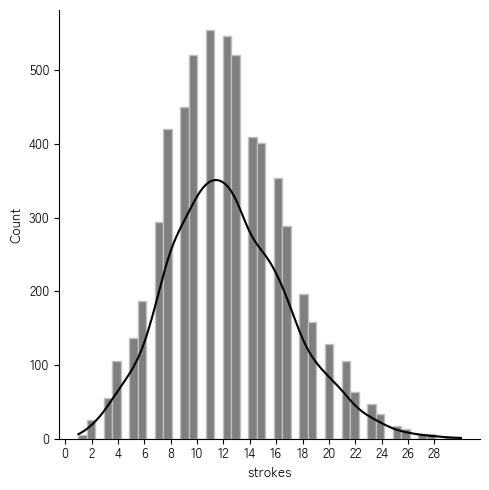

In [8]:
#Distribution plot for the unique dataset
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

dist_plot = sns.displot(data=full_df[0:6053],x='strokes' , fill = True, color='black',edgecolor="silver", linewidth=1, kde='True')
dist_plot.set(xticks=np.arange(0,30,2))
plt.show()

In [9]:
#Create the data in the form of a numpy array

# data0 = img_data(df_extra, 0,6353, )
# data1 = img_data(df_extra, 0,6353, )
# data2 = img_data(df_extra, 0,6353, )
# data3 = img_data(df_extra, 0,6353, )
# data4 = img_data(df_extra, 0,6353, )
# data5 = img_data(df_extra, 0,6353, )
# data6 = np.array(img_data(df_extra, 0,6353, 'New Tegomin'))/255
# plt.ioff()
# plt.close()

In [10]:
#normalise our data such that the range for each element is 0 to 1 and save as a npy file

# data=np.array(data)/255
# data.shape

In [11]:
# full_data = np.load('/Users/rashidalawadhi/Documents/GitHub/NN_kanji/data/trimmed_df/full_data_trimmed.npy')
full_data = np.load('data/trimmed_df/full_data_trimmed.npy')
test_data = np.load('data/trimmed_df/full_test_data.npy')

In [12]:
print(full_data.shape)
print(full_df.shape)

(30265, 40, 40)
(30265, 2)


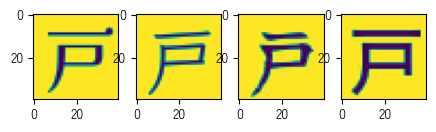

In [13]:
#See how the different fonts compare

for i in range(1, 5):
    plt.subplot(1,5, i)
    plt.imshow(full_data[63+(6052*i)+i])

plt.show()

In [14]:
#Note that our maximun number of stroke is 30

# print(df_extra['strokes'][0:6053].max())
# plt.imshow(full_data[44470], cmap='gray')
# plt.show()
# full_data.shape
full_df['strokes'].max()

30

In [15]:
#split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(full_data, full_df['strokes'].astype('int').to_numpy(), test_size=0.05, shuffle=True)

In [16]:
#Time to build our model and train it

from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, MaxPool2D
from keras import models

In [17]:
input_shape = (40, 40, 1)
num_classes = 30

x_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(X_test, -1)

# Model
model = keras.Sequential()


model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=input_shape))

# model.add(Conv2D(filters=64,kernel_size = (3,3), activation='relu'))
# model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=64,kernel_size = (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=128,kernel_size = (3,3),activation='relu'))
# model.add(MaxPool2D(2,2))
#Added new conv layer and commented out above MaxPool2D
model.add(Conv2D(filters=192,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))

# model.add(Conv2D(filters=1024,kernel_size = (3,3),activation='relu'))
# model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dropout(0.6))
# model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(720,activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(512,activation='relu'))
# model.add(Dense(128,activation='relu'))
# model.add(Dense(128,activation='tanh'))
# model.add(Dense(64,activation='tanh'))
model.add(Dense(num_classes,activation = 'softmax'))

# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)


model.summary()



Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 18, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 192)       221376    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7

2023-05-24 11:46:06.086861: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-24 11:46:06.086992: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
batch_size = 64
epochs = 40

# checkpoint = keras.callbacks.ModelCheckpoint(
#     filepath='/Users/rashidalawadhi/Documents/GitHub/kanji_NN/checkpoints/model_kanji.h5',
#     monitor= "val_loss",
#     verbose = 0,
#     save_freq='epoch',
#     save_best_only =True,
#     save_weights_only = True,
#     mode =  "auto",
# )

# opt = keras.optimizers.Adam(learning_rate=0.05)

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)



Epoch 1/40


2023-05-24 11:46:06.371191: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-24 11:46:06.651820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


360/360 [==============================] - ETA: 0s - loss: 2.5071 - accuracy: 0.1489

2023-05-24 11:46:16.375787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


360/360 [==============================] - 11s 29ms/step - loss: 2.5071 - accuracy: 0.1489 - val_loss: 1.8580 - val_accuracy: 0.2707
Epoch 2/40
360/360 [==============================] - 10s 28ms/step - loss: 1.7693 - accuracy: 0.2814 - val_loss: 1.5392 - val_accuracy: 0.3481
Epoch 3/40
360/360 [==============================] - 10s 28ms/step - loss: 1.5416 - accuracy: 0.3566 - val_loss: 1.4077 - val_accuracy: 0.4255
Epoch 4/40
360/360 [==============================] - 10s 28ms/step - loss: 1.4278 - accuracy: 0.3917 - val_loss: 1.2598 - val_accuracy: 0.4679
Epoch 5/40
360/360 [==============================] - 10s 28ms/step - loss: 1.3240 - accuracy: 0.4343 - val_loss: 1.2835 - val_accuracy: 0.4724
Epoch 6/40
360/360 [==============================] - 10s 29ms/step - loss: 1.2432 - accuracy: 0.4690 - val_loss: 1.2024 - val_accuracy: 0.4978
Epoch 7/40
360/360 [==============================] - 10s 28ms/step - loss: 1.1767 - accuracy: 0.4991 - val_loss: 1.0835 - val_accuracy: 0.5669
Epo

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[0.8311861157417297, 0.7067371010780334]


In [20]:
print('Average accuracy over '+str(epochs)+' epochs:',str((np.mean(history.history['val_accuracy'])*100).round(1))+' %','bach='+str(batch_size))
print('Average loss over '+str(epochs)+' epochs:',str((np.mean(history.history['val_loss'])).round(3)))
print(max(history.history['val_accuracy']),min(history.history['val_loss']))

Average accuracy over 40 epochs: 62.7 % bach=64
Average loss over 40 epochs: 0.939
0.7360458970069885 0.698786199092865


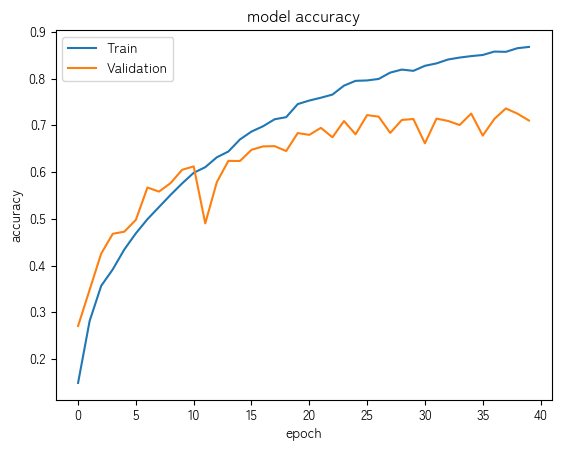

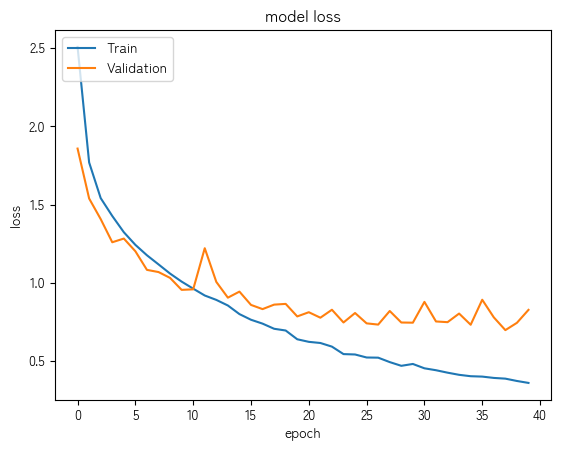

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [22]:
#Save model

from tensorflow.keras.models import load_model



In [ ]:
#Uncomment to save model

model.save('/Users/rashidalawadhi/Documents/GitHub/NN_kanji/models/kanjiCNN_77pct.h5')

In [22]:
#This is a model which obtained a reasonable accuracy of around 82% on the test set.

new_model = load_model('/Users/rashidalawadhi/Documents/GitHub/NN_kanji/models/kanjiCNN_77pct.h5')

new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 148)       170644    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 148)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 5328)              0

In [ ]:
new_model.evaluate(x_test, y_test, verbose=0)

In [ ]:
#Testing on kanji in different fonts

#Choose your ttf font of your choice

matplotlib.rcParams['font.family'] = ['Nchifont+']

test_path = '/Users/rashidalawadhi/Documents/GitHub/kanji_NN/diff_font'

no = 0
data=[]
for i in df_extra['kanji'][0:6352]:
    txt_img(i)
    name = 'diff_font/kanji_' + str(no)+'.png'
    plt.savefig(name, dpi=25)
    no +=1
    # rot_img = np.array(Image.fromarray(np.array(Image.open(name).convert('L'))).rotate(fillcolor='white', angle=np.random.randint(360,size=1)))
    data.append(np.expand_dims(np.array(Image.open(name).convert('L'))/255,axis=0))
    # data.append(rot_img)



In [22]:
# np.save('/Users/rashidalawadhi/Documents/GitHub/kanji_NN/data/diff_font_image.npy', data)
data = np.load('/Users/rashidalawadhi/Documents/GitHub/NN_kanji/data/trimmed_df/full_test_data.npy')
data = np.expand_dims(data, 1)



In [23]:
#List of the model's predicted number of strokes
predicted_stroke = []
for i in data:
    predicted_stroke.append(model.predict(i, verbose=0).argmax())

2023-05-24 01:53:10.685320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [24]:
#List of correct number of strokes
correct_stroke = []
for i in pd.concat([test_df['strokes'], test_df['strokes']], ignore_index=True):
    correct_stroke.append(i)



In [25]:
#Number of correct predictions
tot_corr = 0
for i in range(0,600):
    if predicted_stroke[i] == correct_stroke[i]:
        tot_corr +=1

In [26]:
percentage = round(tot_corr/(len(correct_stroke))*100,1)
print('The accuracy on the new font is: ', str(percentage)+'%')

The accuracy on the new font is:  49.0%


1/1 [==============================] - 0s 12ms/step
The predicted number of strokes is: 19


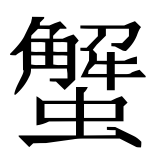

In [29]:
matplotlib.rcParams['font.family'] = ['XANO-mincho-U32']
txt_img('蟹')
plt.savefig('tstimg.png', dpi=25)
tst_img = np.expand_dims(np.array(Image.open('tstimg.png').convert('L'))/255,axis=0)
pred = model.predict(tst_img)
print('The predicted number of strokes is:',pred.argmax())
plt.show()

In [99]:
loc = np.where(df_extra['kanji']=='囙')[0]
loc

array([7000])

In [87]:
kernel = np.ones((2,2),np.uint8) 

eroded_image = cv2.erode(np.ones((32,32))-tst_img.squeeze(),kernel,iterations = 1) 

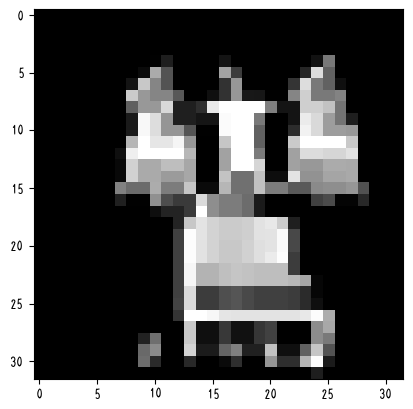

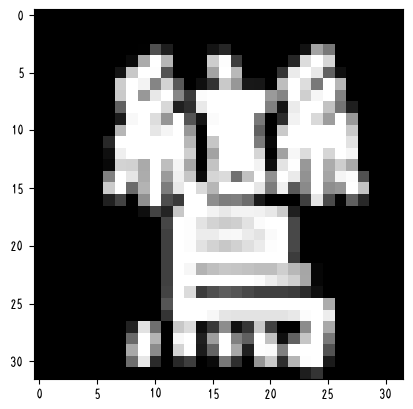

In [88]:
plt.imshow(eroded_image, 'gray')
plt.show()
plt.imshow(np.ones((32,32))-tst_img.squeeze(),'gray')
plt.show()

In [ ]:
plt.imshow(data[23][0])
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [36]:
pred_y = model.predict(x_train)

 17/899 [..............................] - ETA: 5s

2023-05-23 00:50:28.454125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


899/899 [==============================] - 8s 8ms/step


In [37]:
pred_label = []
for i in range(0, len(pred_y)):
    pred_label.append(pred_y[i].argmax())

In [38]:
cm = (confusion_matrix(y_train, pred_label)).astype('int')

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


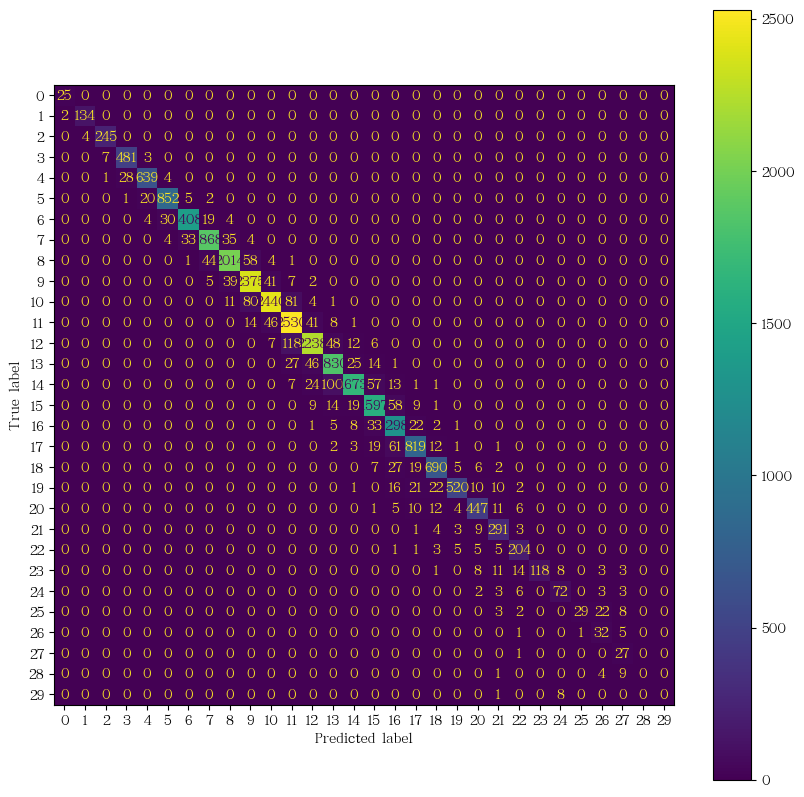

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='viridis')
plt.ioff

plt.show()

In [ ]:
plt.imshow(x_test[976])
plt.show()

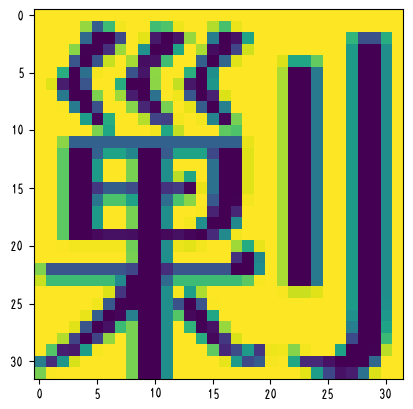

13

In [46]:
plt.imshow(x_train[8].squeeze())
plt.show()
pred_y[8].argmax()

In [67]:
pred.argmax()

1

In [126]:
df_extra['kanji'][6361]

'丣'